* 'textract' install failures caused by dependencies.  Not friendly with 64-bit os and requires a compilier for part of the installation = pain in the ass!
* https://github.com/deanmalmgren/textract/issues/111
* http://www.swig.org/Doc1.3/Windows.html
* https://medium.com/@rqaiserr/how-to-convert-pdfs-into-searchable-key-words-with-python-85aab86c544f

# NLTK - Natural Language Toolkit

* http://www.nltk.org/index.html

In [1]:
import PyPDF2 
#import textract
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import pprint as pp

In [2]:
#write a for-loop to open many files -- leave a comment if you'd #like to learn how
filename = 'Keysight N6705 DC Power Analyzer.pdf' 
#open allows you to read the file
pdfFileObj = open(filename,'rb')
#The pdfReader variable is a readable object that will be parsed
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
#discerning the number of pages will allow us to parse through all #the pages
num_pages = pdfReader.numPages
count = 0
text = ""
#The while loop will read each page
while count < num_pages:
    pageObj = pdfReader.getPage(count)
    count +=1
    text += pageObj.extractText()
#This if statement exists to check if the above library returned #words. It's done because PyPDF2 cannot read scanned files.
if text != "":
   text = text
#If the above returns as False, we run the OCR library textract to #convert scanned/image based PDF files into text
else:
    print('The PDF being processed is an image, not text based PDF.\n'\
          'There are issues getting "textract" installed on 64-bit Windows')
   #text = textract.process(fileurl, method='tesseract', language='eng')
# Now we have a text variable which contains all the text derived #from our PDF file. Type print(text) to see what it contains. It #likely contains a lot of spaces, possibly junk such as '\n' etc.
# Now, we will clean our text variable, and return it as a list of keywords.


In [31]:
#The word_tokenize() function will break our text phrases into #individual words
tokens = word_tokenize(text)
#we'll create a new list which contains punctuation we wish to clean
punctuations = ['(',')',';',':','[',']',',']
#We initialize the stopwords variable which is a list of words like #"The", "I", "and", etc. that don't hold much value as keywords
stop_words = stopwords.words('english')

In [32]:
more_stop_words = ['...', '..', 'the']
for x in more_stop_words:
    stop_words.append(x)

In [33]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [46]:
#We create a list comprehension which only returns a list of words that are NOT IN stop_words and NOT IN punctuations.
keywords = [word.lower() for word in tokens if not word.lower() in stop_words and not word in string.punctuation]

In [47]:
len(keywords)

73315

In [48]:
"""Remove numbers using float test"""
keywords_no_numbers = []
for x in keywords:
    try:
        float(x)
    except:
        keywords_no_numbers.append(x)
        
print(len(keywords_no_numbers))

65796


In [49]:
word_count = {}

In [50]:
"""Strip whitespace and certain characters"""
for x in keywords_no_numbers:
    x = x.lower()
    x = x.strip()
    x = x.strip('-+.!')
    if x not in word_count:
        word_count[x] = 1
    else:
        word_count[x] += 1

In [51]:
pp.pprint(word_count)

{"''": 211,
 "'s": 51,
 "'send": 1,
 "'these": 4,
 '*cls': 17,
 '*e': 1,
 '*ese': 14,
 '*esr': 8,
 '*for': 1,
 '*idn': 12,
 '*opc': 28,
 '*opt': 6,
 '*rcl': 12,
 '*rdt': 6,
 '*rst': 42,
 '*sav': 12,
 '*sre': 16,
 '*stb': 8,
 '*trg': 15,
 '*tst': 7,
 '*wai': 11,
 '//www.keysight.com/find/n6705': 1,
 '//www.sun.com': 1,
 '/local': 1,
 '/ntr': 2,
 '/off': 8,
 '0.0.0.0': 1,
 '0.2,0.8,1.5,0.8,0.2': 3,
 '0.2,0.8,1.5,0.8,0.2,1': 2,
 '0.5,1,1.5,2,2.5,3,3.5,4,4.5,5': 1,
 '02ptr': 1,
 '0a': 1,
 '1,1,1,1,1': 4,
 '1,2': 41,
 '1,2,0.5,1,0.25,1.5,0.1,1,0.75,1.2': 1,
 '1,2,3': 1,
 '1,2,3,4,5,6,7,8,9,10': 2,
 '1,2,4': 2,
 '1,3': 3,
 '1,4': 275,
 '1-7': 5,
 '1-channel': 2,
 '1.000000e': 7,
 '1.023e': 8,
 '1.03e': 8,
 '10,20,30,40,50': 1,
 '10condition': 1,
 '112048204820482048osc124096409640964096lim': 1,
 '11610241161024116102411610243logical': 1,
 '12,30,0': 2,
 '124oc1off': 1,
 '13-15': 5,
 '16,384': 1,
 '16,777,216': 4,
 '169.254.67.5': 1,
 '1:3': 276,
 '1a': 3,
 '1chan': 1,
 '1cvccsame': 1,
 '1log

 'comprise': 1,
 'comprised': 2,
 'computed': 1,
 'computer': 7,
 'concept': 1,
 'concerned': 1,
 'cond': 7,
 'condi': 2,
 'condition': 78,
 'conditioning': 3,
 'conditions': 2,
 'conditon': 1,
 'conducts': 1,
 'confidence': 1,
 'config': 2,
 'configuration': 5,
 'configurations': 5,
 'configure': 3,
 'configured': 32,
 'configures': 1,
 'configuring': 2,
 'conflict': 6,
 'conjunction': 1,
 'connected': 4,
 'connecting': 1,
 'connection': 10,
 'connections': 2,
 'connectivity': 1,
 'connecto': 1,
 'connector': 10,
 'consecutive': 1,
 'consent': 1,
 'consequential': 2,
 'considerations': 2,
 'consist': 4,
 'consisting': 2,
 'consists': 5,
 'const': 8,
 'consta': 2,
 'constant': 62,
 'constant-dwell': 1,
 'constants': 13,
 'cont': 5,
 'contact': 4,
 'contacting': 1,
 'contacts': 1,
 'contai': 1,
 'contain': 2,
 'contained': 4,
 'containing': 16,
 'contains': 44,
 'contents': 7,
 'continually': 1,
 'continue': 1,
 'continued': 14,
 'continues': 1,
 'continuo': 1,
 'continuous': 14,
 'cont

 'generate': 26,
 'generated': 35,
 'generates': 15,
 'generation': 1,
 'generator': 3,
 'generic': 9,
 'ger': 1,
 'get': 4,
 'gets': 3,
 'gger': 3,
 'gh': 2,
 'gif': 3,
 'ging': 1,
 'gister': 1,
 'gisters': 1,
 'gital': 2,
 'give': 5,
 'given': 19,
 'gives': 8,
 'go': 10,
 'goes': 4,
 'governed': 1,
 'government': 2,
 'gpib': 10,
 'gpib0': 2,
 'gpib1': 2,
 'gpibaddress': 11,
 'gram': 1,
 'granted': 1,
 'graphical': 1,
 'greater': 3,
 'gro': 9,
 'ground': 2,
 'group': 53,
 'grouped': 12,
 'grouping': 1,
 'groups': 13,
 'gs': 1,
 'gth': 1,
 'gu': 1,
 'guide': 632,
 'h': 7,
 'handle': 1,
 'hanged': 1,
 'hanges': 1,
 'hanging': 1,
 'hannels': 2,
 'hanning': 4,
 'happens': 3,
 'hardware': 9,
 'hat': 2,
 'hcop': 3,
 'hcopy': 8,
 'header': 32,
 'headers': 5,
 'help': 4,
 'herein': 3,
 'hertz': 2,
 'hex': 1,
 'hh': 4,
 'high': 81,
 'high1': 3,
 'high2': 4,
 'high3': 3,
 'higher': 2,
 'highest': 14,
 'highz': 7,
 'hist': 32,
 'histo': 1,
 'histog': 1,
 'histogam': 1,
 'histogra': 1,
 'histogra

 'outpu': 1,
 'output': 720,
 'output_programming_example': 1,
 'outputs': 22,
 'outs': 1,
 'outside': 11,
 'ov': 14,
 'over-current': 4,
 'over-voltage': 2,
 'overall': 1,
 'overflow': 2,
 'overflowing': 1,
 'override': 14,
 'overrides': 7,
 'overshoots': 3,
 'overvoltage': 2,
 'overvoltsetting': 3,
 'overwrites': 5,
 'overwritten': 3,
 'ovp': 12,
 'ovœ': 5,
 'ow': 1,
 'ower': 3,
 'ows': 1,
 'p': 17,
 'p1': 5,
 'p2': 4,
 'p3': 4,
 'pa': 1,
 'pac': 3,
 'paced': 4,
 'pacing': 14,
 'page': 1,
 'pan': 1,
 'panel': 63,
 'para': 3,
 'parallel': 10,
 'paralleled': 3,
 'param': 5,
 'parame': 5,
 'paramet': 1,
 'paramete': 3,
 'parameter': 395,
 'parameters': 349,
 'parated': 1,
 'parentheses': 3,
 'parser': 1,
 'part': 5,
 'particular': 2,
 'pass': 5,
 'pass/fail': 1,
 'passed': 4,
 'password': 39,
 'path': 26,
 'paths': 1,
 'pattern': 2,
 'pauses': 2,
 'pe': 1,
 'peak': 22,
 'peak-to-peak': 2,
 'pecified': 3,
 'ped': 1,
 'pendent': 1,
 'pending': 10,
 'pensation': 1,
 'per': 28,
 'peration':

 'ter': 5,
 'term': 11,
 'terminal': 4,
 'terminals': 16,
 'terminate': 25,
 'terminated': 2,
 'terminates': 3,
 'termination': 6,
 'terminator': 11,
 'terminators': 1,
 'terms': 5,
 'ters': 3,
 'terval': 1,
 'test': 10,
 'tests': 5,
 'th': 24,
 'tha': 2,
 'theory': 1,
 'ther': 1,
 'therefore': 2,
 'thi': 4,
 'third': 4,
 'though': 1,
 'thought': 1,
 'thr': 1,
 'three': 13,
 'throu': 2,
 'throug': 1,
 'throughout': 2,
 'thus': 2,
 'ti': 4,
 'tial': 1,
 'tiate': 1,
 'tim': 143,
 'time': 756,
 'timeinterval': 3,
 'timer': 17,
 'times': 18,
 'tings': 1,
 'tinp': 1,
 'tinpput': 2,
 'tinput': 2,
 'tint': 9,
 'tinte': 1,
 'tinterval': 34,
 'tion': 5,
 'tive': 2,
 'tly': 1,
 'tmod': 3,
 'tmode': 6,
 'to-0': 2,
 'to-1': 2,
 'to-controller': 1,
 'to-off': 4,
 'to-on': 5,
 'to-peak': 6,
 'together': 1,
 'tools': 1,
 'top': 159,
 'tort': 1,
 'total': 26,
 'tout': 21,
 'toutp': 1,
 'toutput': 52,
 'tput': 1,
 'tr': 2,
 'trace': 10,
 'traceable': 1,
 'track': 2,
 'tracki': 1,
 'tracking': 10,
 'tra

# Plot the WordCloud

* https://www.quora.com/How-can-I-generate-a-word-cloud-in-python-using-exclusively-matplotlib-seaborn-and-pandas-numpy-packages
* https://stackoverflow.com/questions/44750574/creating-wordcloud-using-python
* https://github.com/amueller/word_cloud
* https://stackoverflow.com/questions/28786534/increase-resolution-with-word-cloud-and-remove-empty-border

In [52]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [53]:
Counter(keywords_no_numbers)

Counter({'programmer™s': 583,
         'reference': 605,
         'guide': 632,
         'keysight': 42,
         'n6705': 597,
         'dc': 162,
         'power': 179,
         'analyze': 1,
         'r': 32,
         'legal': 2,
         'notices': 1,
         '©': 2,
         'technologies': 14,
         'part': 5,
         'document': 8,
         'may': 42,
         'photocopied': 1,
         'reproduced': 1,
         'translated': 1,
         'another': 13,
         'language': 14,
         'without': 4,
         'prior': 5,
         'agreement': 3,
         'written': 5,
         'consent': 1,
         'governed': 1,
         'united': 3,
         'states': 14,
         'international': 2,
         'copyright': 1,
         'laws': 1,
         'warranty': 7,
         'material': 2,
         'contained': 4,
         'provided': 7,
         'ﬁas': 1,
         'ﬂ': 2,
         'subject': 2,
         'changed': 12,
         'notice': 2,
         'future': 1,
         'editions': 2,


In [63]:
wordcloud = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(word_count)

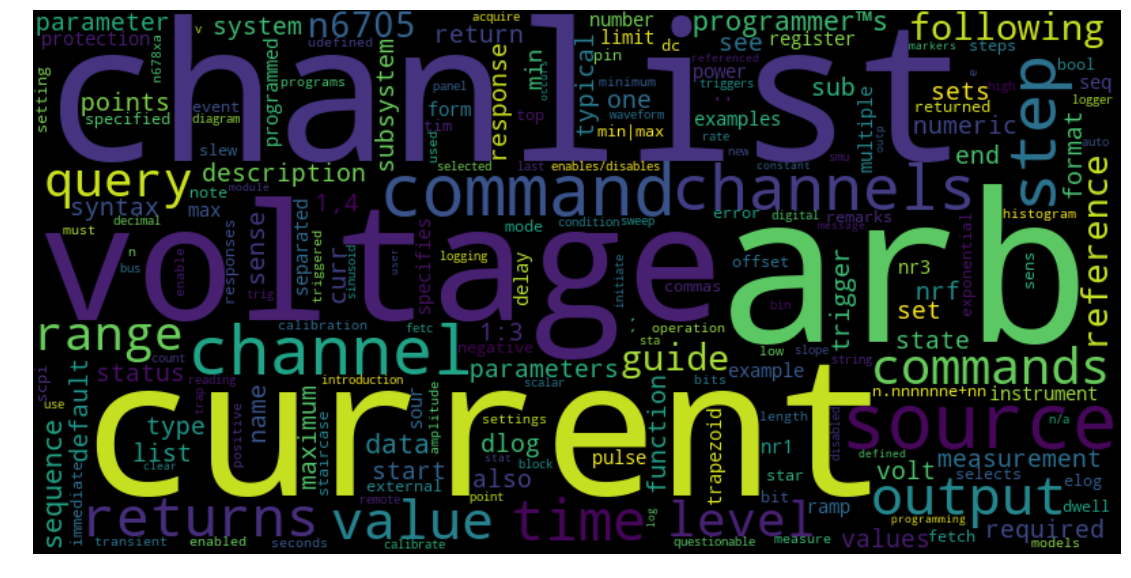

In [65]:
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [57]:
len(word_count)

3014

# Used to update the Natural Language Tool Kit

In [ ]:
import nltk

In [ ]:
nltk.set_proxy('proxy address', ('un', 'pw'))  # comment out if not behind a proxy
nltk.download()